# Monochrome camera calibration
One of the great disadvantages with using lenses is the distortion it introduces to the image. For vacation images, this is usually not a problem, but when we use the image to describe the physical surroundings it becomes important that the images are representative of the scene it captures. An easy way to get an indication of how distorted an image is by looking at what is supposed to be straight lines since they will appear curved. The following exercises you will be calibrating a camera to obtain a camera matrix such that you can undistort images from this camera.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

## Exercise 1
The process of calibrating an image consists of mainly 3 steps: 1) find chessboard-corners in a dataset of images containing a chessboard. 2) Use the corner points to compute a camera matrix. 3) Use the camera matrix to undistort images.

After setting some optimization parameters we can loop over all the images in the `imgs` folder and extract the checkerboard corners.

Use any of the images in the folder `imgs` to extract the number of checkerboard corners there are on the checkerboard. Fill in the information in `nb_vertical` and `nb_horizontal` and look up the opencv [findChessboardCorners](https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html#ga93efa9b0aa890de240ca32b11253dd4a) function and implement it in the below code snippet .

In [2]:

# Implement the number of vertical and horizontal corners
nb_vertical = 9
nb_horizontal = 6


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)        # generates a grid of points. and the reshape fucntin converts the grid into a list of 2D points

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('/home/arth/Desktop/Grandis/rectification/rec2/*.JPG')                              # find all images within the imgs directory
assert images                                                               # ensures that the list of images is not empty


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

   
    #Implement findChessboardCorners here
    ret, corners = cv2.findChessboardCorners(gray, (nb_vertical,nb_horizontal), None)             # ret= boolean indicating success in finding images | corners=detected coorener points

  

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        #cv2.imshow('img',img)
        #cv2.waitKey(500)
        print('found 1')
    
#cv2.destroyAllWindows()

found 1
found 1
found 1
found 1
found 1
found 1
found 1
found 1


Using the extracted corners we can obtain a camera matrix that contains the information needed to undistort images

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv2.imread('/home/arth/Desktop/Grandis/rectification/rec2/IMG_2846.JPG')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

The last step is to actually undistort an image:

Text(0.5, 1.0, 'Undistorted image')

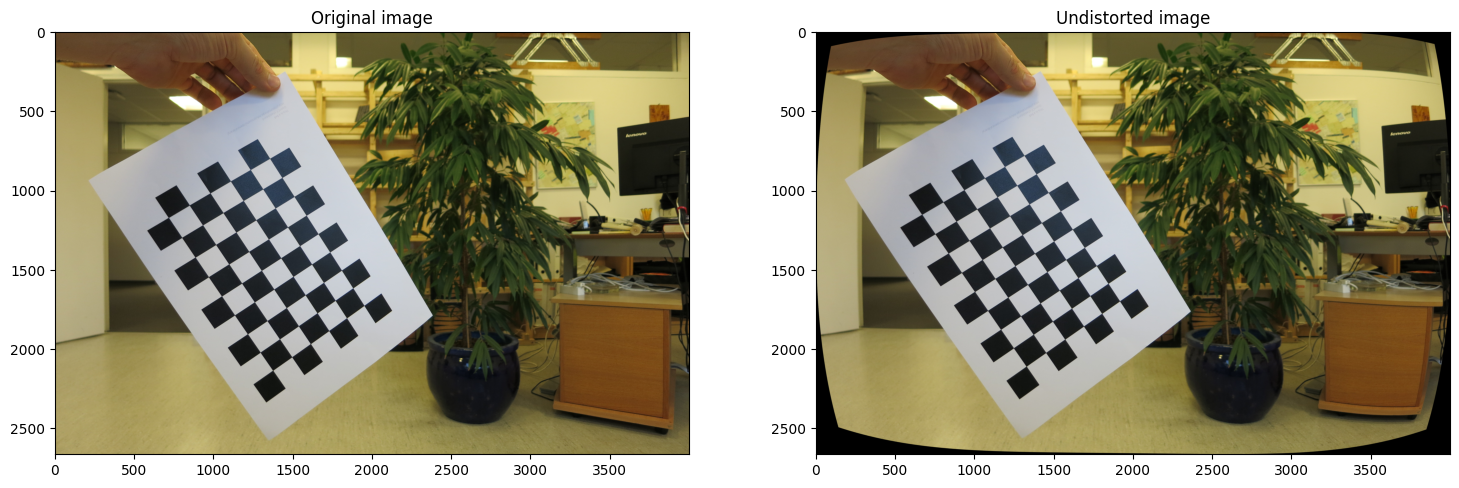

In [4]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

A refining step can be to crop the image such that it doesn't contain the large black areas at the edges of the image.

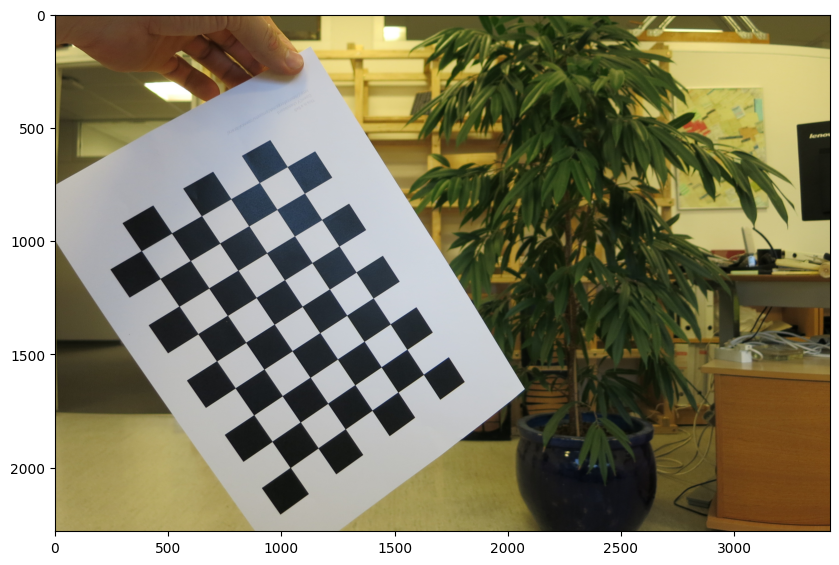

In [5]:
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(10,10))
plt.imshow(dst[...,[2,1,0]])

In [6]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv2.imread('/home/arth/Desktop/Grandis/rectification/unkown_roboflow_fromSEP2022/7520-2-2-_JPG.rf.2c3d3f0e66f44afe3c736d014ce44db1.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

Text(0.5, 1.0, 'Undistorted image')

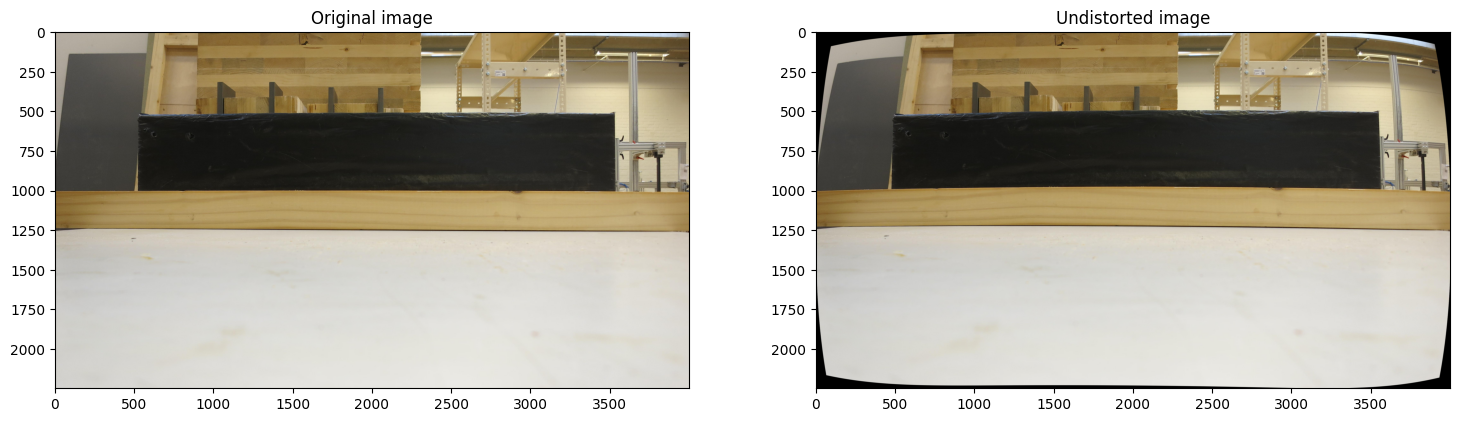

In [7]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

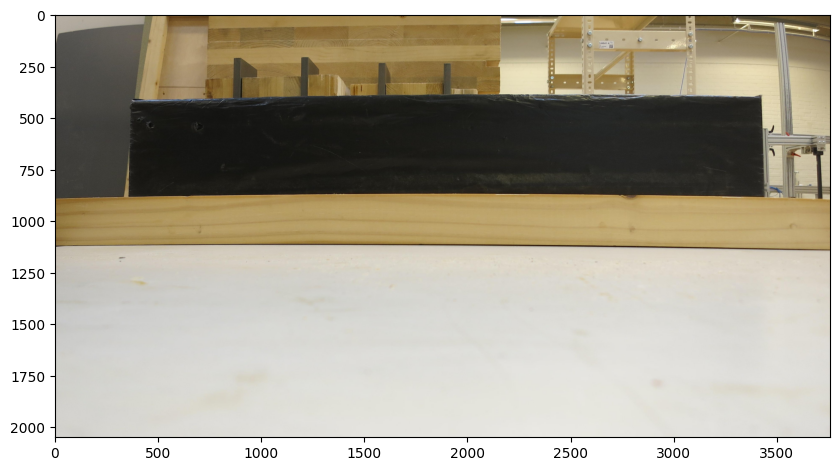

In [8]:
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(10,10))
plt.imshow(dst[...,[2,1,0]])

In [9]:
import cv2
import numpy as np
import os
import glob

# Paths for original and cropped images
original_folder = 'unkown_roboflow_fromSEP2022'
cropped_folder = '/home/arth/Desktop/Grandis/rectification/uknown_c'
output_folder = 'unknown_c_r'

# Camera calibration results
camera_matrix_original = mtx  # Original camera matrix from calibration
distortion_coeffs = dist      # Distortion coefficients from calibration
original_width, original_height = 4000, 2248  # Original image size used in calibration

# Create output folder if it doesn’t exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Check if the directories are correct and contain files
print(f"Checking cropped images in folder: {cropped_folder}")
cropped_files = glob.glob(os.path.join(cropped_folder, '*.jpg'))
if not cropped_files:
    print("No files found in cropped images folder. Please check the folder path and file extensions.")
else:
    print(f"Found {len(cropped_files)} cropped images to process.")

# Loop through each cropped image in the folder
for cropped_img_path in cropped_files:
    print(f"Processing cropped image: {cropped_img_path}")

    # Load cropped image
    cropped_img = cv2.imread(cropped_img_path)
    
    # Remove the "cropped_" prefix to get the matching original image name
    original_img_name = os.path.basename(cropped_img_path).replace("cropped_", "")
    original_img_path = os.path.join(original_folder, original_img_name)
    print(f"Expected original image path: {original_img_path}")  # Debugging line

    # Load original image
    original_img = cv2.imread(original_img_path)
    
    # Debugging Step 1: Check if images are loaded correctly
    if cropped_img is None:
        print(f"Failed to load cropped image: {cropped_img_path}")
        continue
    if original_img is None:
        print(f"Failed to load original image: {original_img_path}. Check if file exists or if filename matches.")
        continue

    # Perform template matching to find the location of the cropped image in the original image
    result = cv2.matchTemplate(original_img, cropped_img, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Debugging Step 2: Print max_val to check matching quality
    print(f"Matching score for {cropped_img_path} against {original_img_path}: {max_val}")

    # Check if the match quality is above a reasonable threshold
    if max_val < 0.5:  # Adjust this threshold as needed
        print(f"No reliable match found for {cropped_img_path}. Max match score: {max_val}")
        continue  # Skip if the match isn't reliable

    # Print a message confirming the match
    print(f"Match found between original image '{original_img_name}' and cropped image '{os.path.basename(cropped_img_path)}'.")

    # Use max_loc as the top-left corner of the cropped image in the original image
    offset_x, offset_y = max_loc

    # Calculate padding based on the detected location
    pad_top = offset_y
    pad_left = offset_x
    pad_bottom = original_height - cropped_img.shape[0] - pad_top
    pad_right = original_width - cropped_img.shape[1] - pad_left

    # Pad the cropped image with black to make it the same size as the original
    padded_img = cv2.copyMakeBorder(cropped_img, pad_top, pad_bottom, pad_left, pad_right,
                                    cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Adjust the principal point in the camera matrix
    camera_matrix_adjusted = camera_matrix_original.copy()
    camera_matrix_adjusted[0, 2] -= pad_left
    camera_matrix_adjusted[1, 2] -= pad_top

    # Apply rectification using the adjusted camera matrix
    rectified_img = cv2.undistort(padded_img, camera_matrix_adjusted, distortion_coeffs)

    # Save the rectified image
    output_path = os.path.join(output_folder, os.path.basename(cropped_img_path))
    cv2.imwrite(output_path, rectified_img)
    print(f"Saved rectified image to {output_path}")

print("Rectification completed for all cropped images.")


Checking cropped images in folder: /home/arth/Desktop/Grandis/rectification/uknown_c
Found 518 cropped images to process.
Processing cropped image: /home/arth/Desktop/Grandis/rectification/uknown_c/cropped_7699-4-4-_JPG.rf.55ef0ce98309ac50e3aacb301b77fecf.jpg
Expected original image path: unkown_roboflow_fromSEP2022/7699-4-4-_JPG.rf.55ef0ce98309ac50e3aacb301b77fecf.jpg
Matching score for /home/arth/Desktop/Grandis/rectification/uknown_c/cropped_7699-4-4-_JPG.rf.55ef0ce98309ac50e3aacb301b77fecf.jpg against unkown_roboflow_fromSEP2022/7699-4-4-_JPG.rf.55ef0ce98309ac50e3aacb301b77fecf.jpg: 0.5201829671859741
Match found between original image '7699-4-4-_JPG.rf.55ef0ce98309ac50e3aacb301b77fecf.jpg' and cropped image 'cropped_7699-4-4-_JPG.rf.55ef0ce98309ac50e3aacb301b77fecf.jpg'.
Saved rectified image to unknown_c_r/cropped_7699-4-4-_JPG.rf.55ef0ce98309ac50e3aacb301b77fecf.jpg
Processing cropped image: /home/arth/Desktop/Grandis/rectification/uknown_c/cropped_7725-3-1-_JPG.rf.1d0de76d379b4

KeyboardInterrupt: 

https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html